4/2 study material

copied from:
https://github.com/dhrim/joongang_2020_03/blob/master/material/deep_learning/Face_Recognition.ipynb

주어진 영상에서 사람 얼굴을 잡아내고(recognition) 누구인지 인식(detection)

face recognition keras 구글링

dlib
- 얼굴 탐지, face detection
- 얼굴 인식, face recognition

dlib(detection) - cnn(classification) - 이름 작성을 위한 caption 출력

In [0]:
"""
# 무한루프로 고용량 메모리 달라는 꼼수
a = []
while(True):
  a.append(1)
"""

# 얼굴 인식

copy from : https://github.com/santhalakshminarayana/face-recognition/blob/master/Face_Recognition.ipynb

아티클 : https://medium.com/analytics-vidhya/face-recognition-with-vgg-face-in-keras-96e6bc1951d5


In [1]:
# 구글 마운트 기능 없을 때(불과 3달 전) 쓰던 기능 코드

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!cp '/content/drive/My Drive/Colab Notebooks/Face_Recognition.zip' ./

!unzip Face_Recognition.zip

Archive:  Face_Recognition.zip
  inflating: Face_Recognition/.DS_Store  
   creating: Face_Recognition/images/
  inflating: Face_Recognition/images/.DS_Store  
   creating: Face_Recognition/images/faker/
  inflating: Face_Recognition/images/faker/1.jpg  
  inflating: Face_Recognition/images/faker/10.jpg  
  inflating: Face_Recognition/images/faker/11.jpg  
  inflating: Face_Recognition/images/faker/12.jpg  
  inflating: Face_Recognition/images/faker/13.jpg  
  inflating: Face_Recognition/images/faker/14.jpg  
  inflating: Face_Recognition/images/faker/15.jpg  
  inflating: Face_Recognition/images/faker/16.jpg  
  inflating: Face_Recognition/images/faker/17.jpg  
  inflating: Face_Recognition/images/faker/18.jpg  
  inflating: Face_Recognition/images/faker/19.jpg  
  inflating: Face_Recognition/images/faker/2.jpg  
  inflating: Face_Recognition/images/faker/20.jpg  
  inflating: Face_Recognition/images/faker/21.jpg  
  inflating: Face_Recognition/images/faker/22.jpg  
  inflating: Face_

In [0]:
"""
!rm -rf Face_Recognitioin
!rm -rf images

!mkdir Face_Recognition

!cp '/content/drive/My Drive/Colab Notebooks/Face_Recognition.zip' ./

!unzip Face_Recognition.zip
!mv images Face_Recognitioin/
"""

In [3]:
#%cd /content/drive/My Drive/Colab Notebooks/Face_Recognition
# 쉘의 명령 실행 결과가 나중에도 영향이 남아있게
# 느낌표로 하면 이전 명령으로 돌아가게 됨

%cd /content/Face_Recognition

/content/Face_Recognition


In [0]:
path = '/content/Face_Recognition'

In [0]:
import os
import glob

In [0]:
"""
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/images/*_[1-9]*.jpg'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])
"""

image_path_names = glob.glob("**/*.jpg", recursive=True)

In [0]:
person_names = ["jobs", "faker", "iu", "me"]

In [9]:
print(len(image_path_names))
print(image_path_names[:5])

108
['images/iu/9.jpg', 'images/iu/34.jpg', 'images/iu/6.jpg', 'images/iu/23.jpg', 'images/iu/8.jpg']


In [10]:
person_names

['jobs', 'faker', 'iu', 'me']

  There are total 108 images containing 27 images per person in average.

In [11]:
# 아래 코드에 맞춰 파일 명 변경
import shutil

for a_file_name in image_path_names:
  new_file_name = a_file_name.replace("/","_").replace("images_","images/")
  shutil.move(a_file_name, new_file_name)
  print("file moved.", a_file_name, "-->", new_file_name)

for person_name in person_names:
  shutil.rmtree("images/"+person_name)
  print("images/"+person_name+" removed.")

file moved. images/iu/9.jpg --> images/iu_9.jpg
file moved. images/iu/34.jpg --> images/iu_34.jpg
file moved. images/iu/6.jpg --> images/iu_6.jpg
file moved. images/iu/23.jpg --> images/iu_23.jpg
file moved. images/iu/8.jpg --> images/iu_8.jpg
file moved. images/iu/22.jpg --> images/iu_22.jpg
file moved. images/iu/11.jpg --> images/iu_11.jpg
file moved. images/iu/25.jpg --> images/iu_25.jpg
file moved. images/iu/24.jpg --> images/iu_24.jpg
file moved. images/iu/21.jpg --> images/iu_21.jpg
file moved. images/iu/4.jpg --> images/iu_4.jpg
file moved. images/iu/28.jpg --> images/iu_28.jpg
file moved. images/iu/16.jpg --> images/iu_16.jpg
file moved. images/iu/29.jpg --> images/iu_29.jpg
file moved. images/iu/3.jpg --> images/iu_3.jpg
file moved. images/iu/2.jpg --> images/iu_2.jpg
file moved. images/iu/14.jpg --> images/iu_14.jpg
file moved. images/iu/30.jpg --> images/iu_30.jpg
file moved. images/iu/33.jpg --> images/iu_33.jpg
file moved. images/iu/18.jpg --> images/iu_18.jpg
file moved. 

In [12]:
image_path_names = glob.glob("**/*.jpg", recursive=True)
print(image_path_names[:5])

['images/iu_7.jpg', 'images/iu_33.jpg', 'images/jobs_4.jpg', 'images/faker_15.jpg', 'images/jobs_32.jpg']


## Dlib face detector 모델 다운로드

In [13]:
# Download Dlib CNN face detector
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2020-04-02 05:36:28--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.11MB/s    in 0.6s    

2020-04-02 05:36:29 (1.11 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [0]:
# 압축포맷 (압축 풀기)
!bzip2 -dk mmod_human_face_detector.dat.bz2

In [0]:
# 다운받은 파일(압축된) 삭제하기
%rm mmod_human_face_detector.dat.bz2

In [0]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [0]:
# Load CNN face detector into dlib
# 구현은 파이썬이 아닌 C++로 되어 있음
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [0]:
os.mkdir(path+'/Images_crop/')

In [0]:
# For each person create a separate folder
# images_crop 하위 디렉토리를 사람 이름마다 생성
for person in person_names:
  os.mkdir(path+'/Images_crop/'+person+'/')

In [0]:
# 문제 있는 파일만 지우려고 하다가 try-catch 구문 사용하기로 결정
"""
!rm -rf images/faker_28.jpg
!rm -rf images/faker_27.jpg
!rm -rf images/faker_1.jpg
!rm -rf images/faker_8.jpg
!rm -rf images/faker_2.jpg
!rm -rf images/faker_9.jpg
!rm -rf images/faker_7.jpg
!rm -rf images/jobs_7.jpg
!rm -rf images/jobs_16.jpg
!rm -rf images/faker_16.jpg
!rm -rf images/faker_10.jpg
!rm -rf images/faker_29.jpg
!rm -rf images/jobs_9.jpg
!rm -rf images/me_2.jpg
!rm -rf images/me_3.jpg
!rm -rf images/me_5.jpg
!rm -rf images/faker_11.jpg
!rm -rf images/faker_33.jpg
!rm -rf images/jobs_5.jpg
!rm -rf images/me_6.jpg

image_path_names = glob. glob("**/*.jpg", recursive=True)
"""

In [0]:
!rm -rf images/me_*.jpg
image_path_names = glob. glob("images/**/*.jpg", recursive=True)
person_names = [ "jobs", "faker", "iu"]

In [78]:
# Detect face, crop detected face and save them in corresponding person folder
good_file_names = [] # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<

for file_name in image_path_names:
  # 오류나는 파일 위치 알아내기
  print(file_name)
  img=cv2.imread(file_name)
  # out of memory (RuntimeError) 처리를 위해 이미지 resize
  img = cv2.resize(img, None, fx=0.5, fy=0.5)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  # 얼굴만 들어감
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  try:# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    cv2.imwrite(img_path,img_crop)
    good_file_names.append(file_name)   # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
  except:# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    print(file_name, "not processed")# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<

image_path_names = good_file_names

images/iu_7.jpg
images/iu_33.jpg
images/jobs_4.jpg
images/faker_15.jpg
images/jobs_32.jpg
images/iu_29.jpg
images/jobs_2.jpg
images/jobs_19.jpg
images/jobs_18.jpg
images/iu_19.jpg
images/iu_8.jpg
images/jobs_3.jpg
images/faker_4.jpg
images/faker_12.jpg
images/jobs_13.jpg
images/faker_26.jpg
images/jobs_8.jpg
images/iu_32.jpg
images/iu_25.jpg
images/faker_5.jpg
images/jobs_33.jpg
images/jobs_20.jpg
images/iu_1.jpg
images/jobs_25.jpg
images/iu_21.jpg
images/jobs_35.jpg
images/iu_31.jpg
images/jobs_15.jpg
images/iu_10.jpg
images/iu_17.jpg
images/iu_6.jpg
images/iu_34.jpg
images/iu_11.jpg
images/iu_14.jpg
images/jobs_29.jpg
images/iu_12.jpg
images/faker_30.jpg
images/faker_32.jpg
images/jobs_17.jpg
images/faker_17.jpg
images/faker_23.jpg
images/jobs_12.jpg
images/jobs_23.jpg
images/faker_20.jpg
images/jobs_10.jpg
images/iu_20.jpg
images/iu_27.jpg
images/jobs_34.jpg
images/faker_3.jpg
images/iu_28.jpg
images/jobs_21.jpg
images/faker_18.jpg
images/iu_2.jpg
images/jobs_27.jpg
images/jobs_11.j

In [0]:
#!rm -rf Images_crop/me

In [83]:
# (수업 시간 내 결과를 보기 위해 만든 코드임, 절대 하면 안됨!)
#!mkdir Images_test
!cp images/iu_1.jpg Images_test/
!cp images/faker_12.jpg Images_test/
!cp images/jobs_1.jpg Images_test/

mkdir: cannot create directory ‘Images_test’: File exists


In [0]:
# Get Image names for testing
test_image_path_names=[]
# for file_name in glob.glob(path+'/Images_test/*_[123].jpg'):
for file_name in glob.glob(path+'/Images_test/*_*.jpg'):
  test_image_path_names.append(file_name)

In [88]:
len(test_image_path_names)
print(test_image_path_names)

['/content/Face_Recognition/Images_test/faker_12.jpg', '/content/Face_Recognition/Images_test/iu_1.jpg', '/content/Face_Recognition/Images_test/jobs_1.jpg']


For each person 1 image to test in Images_test folder.

In [0]:
os.mkdir(path+'/Test_Images_crop/')

In [0]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [95]:
# Detect face,crop face and save in corresponding folder
for file_name in test_image_path_names:
  # 오류나는 파일 위치 알아내기
  print(file_name)
  img=cv2.imread(file_name)
  # out of memory (RuntimeError) 처리를 위해 이미지 resize
  img = cv2.resize(img, None, fx=0.5, fy=0.5)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

/content/Face_Recognition/Images_test/faker_12.jpg
/content/Face_Recognition/Images_test/iu_1.jpg
/content/Face_Recognition/Images_test/jobs_1.jpg


<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (60 images)
|Images_crop /
|  |--angelamerkel
|     |--(10 images)
|  |--jinping / 
|     |--(10 images)
|  |--lakshminarayana / 
|         |--(10 imgaes)
|  |--modi / (10 images)
|  |--putin / (10 images) 
|  |--trump / (10 images)
|Images_test / 
|  |-- .. / (18 images)
|Images_test_crop / 
|  |--angelamerkel / (3 images)
|  |--jinping / (3 images)
|  |--lakshminarayana / (3 imgaes)
|  |--modi / (3 images)
|  |--putin / (3 images) 
|Face_Recognition.ipynb
|mmod_human_face_detector.dat
</pre>

In [96]:
! pip install gdown

In [97]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/Face_Recognition/vgg_face_weights.h5
580MB [00:05, 104MB/s]


In [98]:
%ls

images/       Images_test/                  Test_Images_crop/
Images_crop/  mmod_human_face_detector.dat  vgg_face_weights.h5


In [99]:
! pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 450kB 32.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=044d60e939f68454434694008f8890dda6567c71fc5e998ae51271599a01266a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [0]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
# 모델 정의
# 제외된 마지막 노드?는 학습에 사용된 개별적인 것
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [0]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [106]:
# 모델 정의
person_rep

{0: 'iu', 1: 'faker', 2: 'jobs'}

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [0]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [0]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [0]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [0]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=4,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [113]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 86 samples, validate on 3 samples
Epoch 1/100
86/86 [==============================] - 2s 23ms/sample - loss: 0.8749 - accuracy: 0.6395 - val_loss: 0.1905 - val_accuracy: 1.0000
Epoch 2/100
86/86 [==============================] - 0s 385us/sample - loss: 0.4398 - accuracy: 0.9186 - val_loss: 0.1593 - val_accuracy: 1.0000
Epoch 3/100
86/86 [==============================] - 0s 389us/sample - loss: 0.3584 - accuracy: 0.9651 - val_loss: 0.1731 - val_accuracy: 1.0000
Epoch 4/100
86/86 [==============================] - 0s 380us/sample - loss: 0.3114 - accuracy: 0.9767 - val_loss: 0.1250 - val_accuracy: 1.0000
Epoch 5/100
86/86 [==============================] - 0s 445us/sample - loss: 0.3354 - accuracy: 0.9767 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 6/100
86/86 [==============================] - 0s 392us/sample - loss: 0.2964 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 1.0000
Epoch 7/100
86/86 [==============================] - 0s 401us/sample - loss: 0.3184 - ac

In [0]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'face_classifier_model.h5')

In [0]:
# Load saved model
classifier_model=tf.keras.models.load_model('face_classifier_model.h5')

In [0]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Test_Images/'

In [0]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [0]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [119]:
# Label names for class numbers
print(person_rep)
#person_rep={0:'Narendra Modi',1:'Donald Trump',2:'Angela Merkel',3:'Xi Jinping',4:'Lakshmi Narayana',5:'Vladimir Putin'}

{0: 'iu', 1: 'faker', 2: 'jobs'}


In [0]:
os.mkdir(path+'/Predictions')

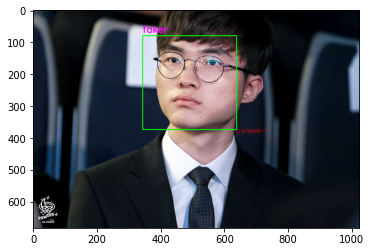

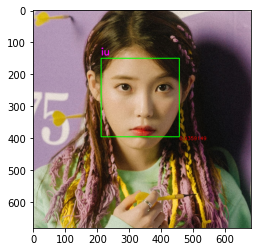

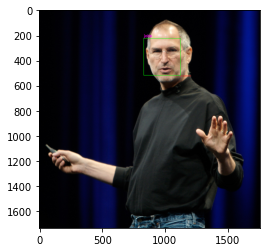

In [123]:
for img_name in os.listdir('Images_test/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Images_test/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Images_test/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Images_test/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Images_test/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name,img)
  plot(img)